# Libraries.io programming language exploration

#### Prerequisites

In [1]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import schemas

timestamp_format = 'YYYY-MM-DD HH:mm:ss z'


def init_spark():
    spark = SparkSession.builder\
        .master('local[*]') \
        .appName('Libraries.io language exploration') \
        .config("spark.executor.memory", "8g") \
        .config("spark.driver.memory", "2g") \
        .config("spark.local.dir", "./tmp") \
        .getOrCreate()
    sc = spark.sparkContext
    return spark, sc

spark, sc = init_spark()
languages = ['Java', 'Python', 'C#', 'Objective-C', 'C++', 'Ruby', 'PHP', 'JavaScript']

### Data extraction

Let's extract now the data for plotting the evolution of data.

We'll extract for each language and year the number of repositories that have that specific language.

So one row of our data frame will have:
* language
* year
* number of repositories in that year associated with the language

In [2]:
repositories = spark.read.csv(
    "data/repositories-1.4.0-2018-12-22.csv", 
    header=True, 
    timestampFormat=timestamp_format,
    schema=schemas.repositories
)

languages_df = spark.createDataFrame(languages, repositories.schema['Language'].dataType)
repositories = repositories.join(languages_df, repositories['Language'] == languages_df['value'])

result = repositories.select(year('Created Timestamp').alias('year'), 'Language') \
    .groupBy('Language', 'year') \
    .count() \
    .toPandas()

result

,Language,year,count
0,C#,2014,64442
1,C#,2015,137152
2,C#,2009,939
3,C#,2013,40735
4,C#,2010,3251
...,...,...,...
84,Java,2013,158682
85,Java,2009,3099
86,Java,2017,673916
87,Java,2016,688151


### Libraries.io language evolution plot


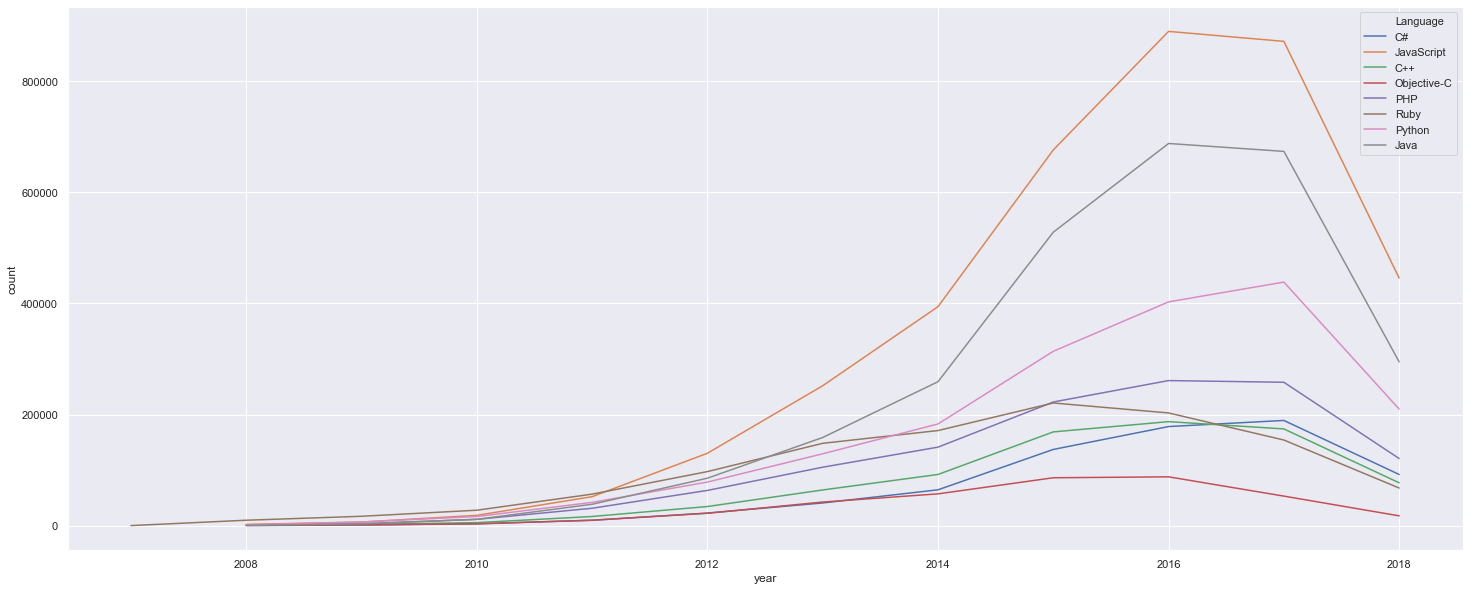

In [4]:
# plot the evolution of languages
plt.figure(figsize=(25, 10))
sns.set(style="darkgrid")
sns.lineplot(x="year", y="count", hue="Language", data=result)